In [1]:
import matplotlib.pyplot as plt

# 3.2


In [2]:
def skewness(samples):

    # média e desvio
    std = np.std(samples)
    mean = np.mean(samples)

    # desvios da média
    deviation = np.array([x - mean for x in samples])

    return np.mean(deviation**3)/std**3


In [3]:
def kurtosis(samples):

    # média e desvio
    std = np.std(samples)
    mean = np.mean(samples)

    # desvios da média
    deviation = np.array([x - mean for x in samples])

    return np.mean(deviation**4)/std**4


Model 2

In [4]:
import sympy as sp
import numpy as np

x = sp.symbols('x', real=True)
F_custom = sp.Piecewise(
    (0, x < 0),
    (1 - (2000 / (x + 2000))**3, True),
)
pdf_custom = sp.simplify(sp.diff(F_custom, x))

F_custom_fn = sp.lambdify(x, F_custom, 'numpy')
pdf_custom_fn = sp.lambdify(x, pdf_custom, 'numpy')

print("CDF (simbolica):", F_custom)
print("PDF (simbolica):", pdf_custom)
xs = np.array([-1000, -1, 0, 1, 10, 100, 1000])
print("Valores CDF:", F_custom_fn(xs))
print("Valores PDF:", pdf_custom_fn(xs))



CDF (simbolica): Piecewise((0, x < 0), (1 - 8000000000/(x + 2000)**3, True))
PDF (simbolica): Piecewise((0, x < 0), (24000000000/(x + 2000)**4, True))
Valores CDF: [0.         0.         0.         0.0014985  0.01485124 0.1361624
 0.7037037 ]
Valores PDF: [0.         0.         0.0015     0.001497   0.00147037 0.00123405
 0.0002963 ]


In [5]:
import numpy as np

def sample_custom(size=1, eps=1e-12, rng=None):
    rng = np.random.default_rng(rng)
    u = rng.random(size)
    u = np.clip(u, 0.0, 1.0 - eps)       # evita u=1 -> inf
    return 2000 / np.power(1.0 - u, 1/3) - 2000

# amostragem da distribuicao
samples_model_2 = sample_custom(1000000, rng=42)



In [6]:
print(np.std(samples_model_2))

1726.8845529153914


In [7]:
print(skewness(samples_model_2))

16.67922814031296


In [8]:
print(kurtosis(samples_model_2))

1378.071901381977


In [9]:
import sympy as sp
import numpy as np

x = sp.symbols('x', real=True)
F_custom = sp.Piecewise(
    (0, x < 0),
    (1 - 0.3 * sp.exp(-0.00001 * x), True),
)
pdf_custom = sp.simplify(sp.diff(F_custom, x))

F_custom_fn = sp.lambdify(x, F_custom, 'numpy')
pdf_custom_fn = sp.lambdify(x, pdf_custom, 'numpy')

xs = np.array([-1, 0, 1, 1e3, 1e5])
print("CDF (simbolica):", F_custom)
print("PDF (simbolica):", pdf_custom)
print("Valores CDF:", F_custom_fn(xs))
print("Valores PDF:", pdf_custom_fn(xs))


CDF (simbolica): Piecewise((0, x < 0), (1 - 0.3*exp(-1.0e-5*x), True))
PDF (simbolica): Piecewise((0, x < 0), (3.0e-6*exp(-1.0e-5*x), True))
Valores CDF: [0.         0.7        0.700003   0.70298505 0.88963617]
Valores PDF: [0.00000000e+00 3.00000000e-06 2.99997000e-06 2.97014950e-06
 1.10363832e-06]


In [10]:
import numpy as np

def sample_mixture(size=1, eps=1e-12, rng=None):
    rng = np.random.default_rng(rng)
    u = rng.random(size)
    # parte discreta (massa em 0)
    x = np.zeros(size)
    mask = u >= 0.7  # 30% vão para a cauda contínua
    u_tail = u[mask]
    # inversa da CDF contínua: 1 - 0.3*exp(-a x), a=1e-5
    a = 1e-5
    u_tail = np.clip(u_tail, 0, 1 - eps)  # evita u=1 -> inf
    x[mask] = -np.log((1 - u_tail) / 0.3) / a
    return x

# amostragem da distribuicao
samples_model_4 = sample_mixture(100000, rng=42)


In [11]:
print(np.std(samples_model_4))

71496.25061662524


In [12]:
print(skewness(samples_model_4))

3.5979470588162163


In [13]:
print(kurtosis(samples_model_4))

20.315953721855113


# 3.5

In [14]:
d = 1000

excess_loss_model_2 = [x for x in samples_model_2 if x > d]
excess_loss_model_4 = [x for x in samples_model_4 if x > d]

In [15]:
print(np.mean(excess_loss_model_2))

2501.713151449508


In [16]:
print(np.mean(excess_loss_model_4))

100977.15070274325


# 3.11

In [17]:
import numpy as np
from scipy.stats import pareto

alpha = 0.5    # shape
theta = 10_000 # scale (mínimo)
rng = np.random.default_rng(42)

# amostrar
samples = pareto.rvs(alpha, scale=theta, size=10_000, random_state=rng)

# PDF e CDF em alguns pontos
xs = np.array([theta, theta*1.5, theta*2])
pdf_vals = pareto.pdf(xs, alpha, scale=theta)
cdf_vals = pareto.cdf(xs, alpha, scale=theta)

print("samples (5):", samples[:5])
print("pdf:", pdf_vals)
print("cdf:", cdf_vals)


samples (5): [195710.54166349  31760.40909086 500136.33082736 109186.86270189
  12187.47242351]
pdf: [5.00000000e-05 2.72165527e-05 1.76776695e-05]
cdf: [0.         0.18350342 0.29289322]


In [18]:
samples

array([195710.54166349,  31760.40909086, 500136.33082736, ...,
        14354.49933292,  25470.27493518,  37111.70855643], shape=(10000,))

In [19]:
excess_loss_variable = [x for x in samples if x > 10000]

In [20]:
mean_excess_loss = np.mean(excess_loss_variable)

In [21]:
print(mean_excess_loss)

2009504282.4540815


# 3.21

In [22]:
import numpy as np
from scipy.stats import gamma

k = 16       # shape
theta = 250   # scale
rng = np.random.default_rng(42)

# amostrar
samples = gamma.rvs(k, scale=theta, size=10_000, random_state=rng)

# PDF e CDF em alguns pontos
xs = np.linspace(0, 30, 6)
pdf_vals = gamma.pdf(xs, k, scale=theta)
cdf_vals = gamma.cdf(xs, k, scale=theta)

print("amostras (5):", samples[:5])
print("pdf:", pdf_vals)
print("cdf:", cdf_vals)


amostras (5): [4225.99679981 4707.17961365 2285.89991721 4044.53520827 3900.06495451]
pdf: [0.00000000e+00 1.50766877e-39 4.82317262e-35 2.06195235e-32
 1.50638716e-30 4.17987922e-29]
cdf: [0.00000000e+00 5.66175031e-40 3.62762055e-35 2.32956043e-32
 2.27240913e-30 7.89296663e-29]


In [23]:
excess_loss_variable = [x for x in samples if x > 6000]

In [24]:
print(np.mean(excess_loss_variable))

6506.25263690091


In [30]:
import numpy as np
from scipy.stats import weibull_min  # shape = k, scale = λ

k = 1.8      # shape
lam = 3.0    # scale
rng = np.random.default_rng(42)

# amostrar
samples_weibull = weibull_min.rvs(k, scale=lam, size=10000, random_state=rng)

# PDF e CDF em alguns pontos
xs = np.linspace(0, 10, 6)
pdf_vals = weibull_min.pdf(xs, k, scale=lam)
cdf_vals = weibull_min.cdf(xs, k, scale=lam)


In [31]:
import numpy as np
from scipy.stats import invweibull  # shape = k

k = 1.8       # shape
lam = 3.0     # scale
rng = np.random.default_rng(42)

samples_invweibull = invweibull.rvs(k, scale=lam, size=10000, random_state=rng)

xs = np.linspace(0.1, 10, 5)
pdf_vals = invweibull.pdf(xs, k, scale=lam)
cdf_vals = invweibull.cdf(xs, k, scale=lam)

In [ ]:
ordered_weibull_sample = np.sort(samples_weibull)

In [120]:
ratio = weibull_min.pdf(ordered_weibull_sample, k, scale=lam)/invweibull.pdf(ordered_weibull_sample, k, scale=lam)

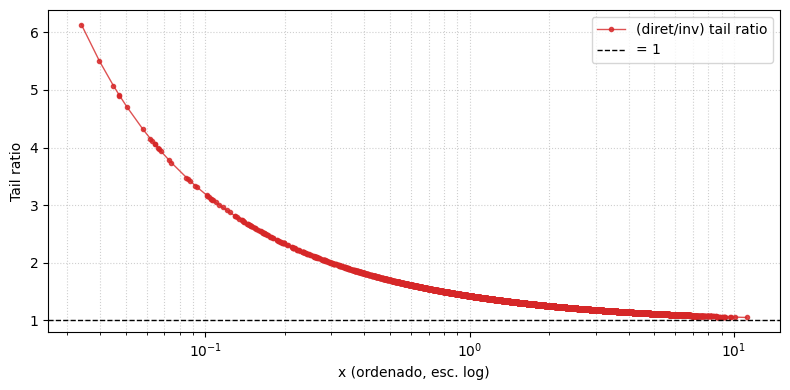

In [122]:
# razao das caudas - weibull e weibull inversa
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(ordered_weibull_sample, ratio, marker='o', markersize=3,
        lw=1, alpha=0.8, color='tab:red', label='(diret/inv) tail ratio')
ax.axhline(1.0, color='k', lw=1, ls='--', label='= 1')
ax.set_xscale('log')
ax.set_xlabel('x (ordenado, esc. log)')
ax.set_ylabel('Tail ratio')
ax.grid(True, which='both', ls=':', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()

# 3.26

In [133]:
k = 0.2       # shape
theta = 500   # scale
rng = np.random.default_rng(42)

# amostrar
samples_gamma = gamma.rvs(k, scale=theta, size=1000000, random_state=rng)

In [134]:
import numpy as np
from scipy.stats import lognorm

mu = 3.709       # média do log
sigma = 1.338   # desvio do log
rng = np.random.default_rng(42)

samples_lognormal = lognorm.rvs(s=sigma, scale=np.exp(mu), size=1000000, random_state=rng)

xs = np.linspace(0.01, 10, 6)
pdf_vals = lognorm.pdf(xs, s=sigma, scale=np.exp(mu))
cdf_vals = lognorm.cdf(xs, s=sigma, scale=np.exp(mu))


In [135]:
import numpy as np
from scipy.stats import lomax  # shape = alpha, scale = lambda

alpha = 2.5   # shape
lam = 150    # scale
rng = np.random.default_rng(42)

# amostrar
samples_pareto = lomax.rvs(alpha, scale=lam, size=1000000, random_state=rng)

# PDF/CDF em alguns pontos
xs = np.linspace(0, 10, 6)  # suporte começa em 0
pdf_vals = lomax.pdf(xs, alpha, scale=lam)
cdf_vals = lomax.cdf(xs, alpha, scale=lam)

print("amostras (5):", samples[:5])
print("pdf:", pdf_vals)
print("cdf:", cdf_vals)


amostras (5): [3.38974314 0.93985126 5.3687326  2.43697306 0.13632773]
pdf: [0.01666667 0.01591166 0.01520007 0.01452888 0.01389531 0.01329683]
cdf: [0.         0.03257083 0.06367559 0.09339804 0.12181618 0.14900268]


In [136]:
ordered_gamma = np.sort(samples_gamma)
ordered_lognormal = np.sort(samples_lognormal)
ordered_pareto = np.sort(samples_pareto)

In [137]:
print(np.mean(samples_gamma))

99.92878164096783


In [138]:
print(np.mean(samples_lognormal))

100.0993419807924


In [139]:
print(np.mean(samples_pareto))

100.0576252674796


In [140]:
print(np.var(samples_gamma))

49738.07020493788


In [141]:
print(np.var(samples_lognormal))

52646.65476256956


In [142]:
print(np.var(samples_pareto))

47019.569873332875


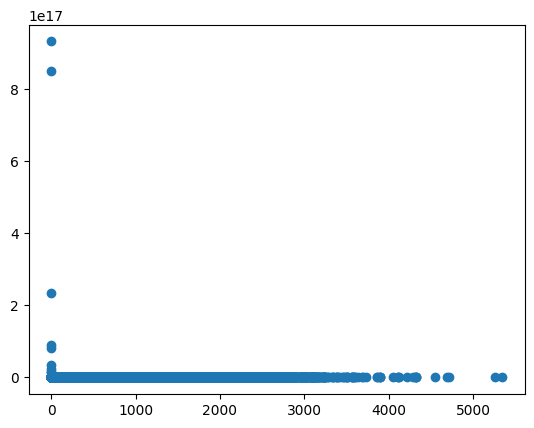

In [143]:
plt.scatter(ordered_gamma, gamma.pdf(ordered_gamma, k, scale=theta))

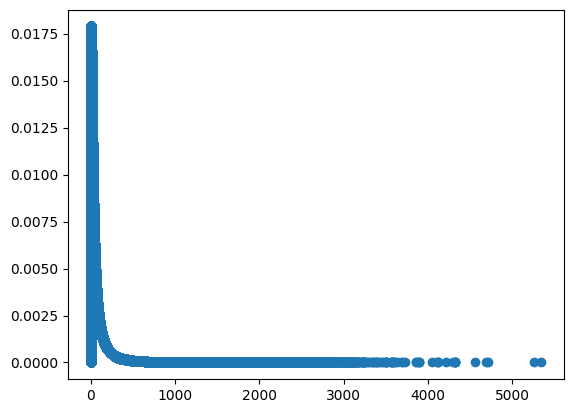

In [144]:
plt.scatter(ordered_gamma, lognorm.pdf(ordered_gamma, s=sigma, scale=np.exp(mu)))

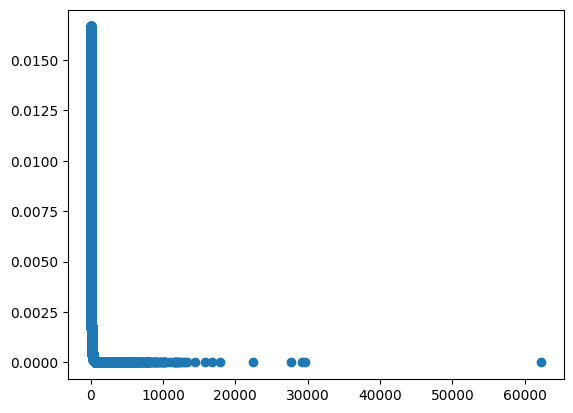

In [145]:
plt.scatter(ordered_pareto, lomax.pdf(ordered_pareto, alpha, scale=lam))

In [146]:
ratio_gamma_lognormal = gamma.pdf(ordered_gamma, k, scale=theta)/lognorm.pdf(ordered_gamma, s=sigma, scale=np.exp(mu))

/tmp/ipykernel_32022/1747973987.py:1: RuntimeWarning: divide by zero encountered in divide
  ratio_gamma_lognormal = gamma.pdf(ordered_gamma, k, scale=theta)/lognorm.pdf(ordered_gamma, s=sigma, scale=np.exp(mu))
/tmp/ipykernel_32022/1747973987.py:1: RuntimeWarning: overflow encountered in divide
  ratio_gamma_lognormal = gamma.pdf(ordered_gamma, k, scale=theta)/lognorm.pdf(ordered_gamma, s=sigma, scale=np.exp(mu))


In [147]:
ratio_lognormal_pareto = lognorm.pdf(ordered_lognormal, s=sigma, scale=np.exp(mu))/lomax.pdf(ordered_lognormal, alpha, scale=lam)

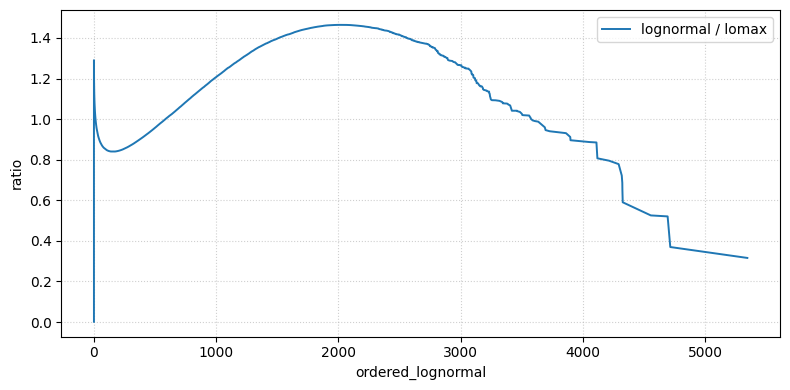

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(ordered_gamma, ratio_lognormal_pareto,
        label='lognormal / lomax', color='tab:blue', lw=1.4)

ax.set_xlabel('ordered_lognormal')
ax.set_ylabel('ratio')
ax.grid(True, which='both', ls=':', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()


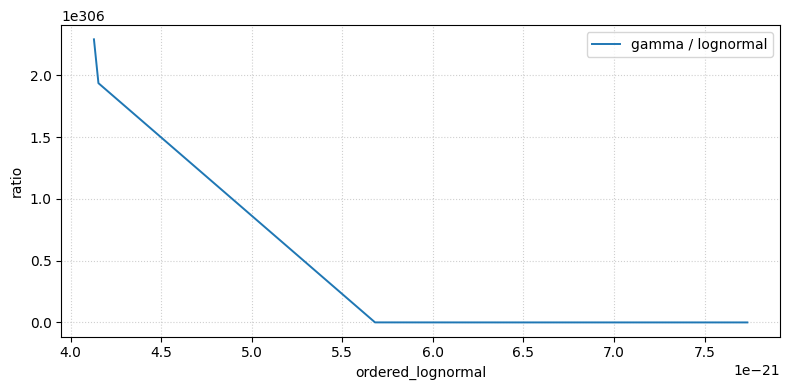

In [160]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(ordered_gamma[:20], ratio_gamma_lognormal[:20],
        label='gamma / lognormal', color='tab:blue', lw=1.4)

ax.set_xlabel('ordered_lognormal')
ax.set_ylabel('ratio')
ax.grid(True, which='both', ls=':', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()